# WRAP UP QUIZ
We convert the regression target into a classification target to predict whether or not an house is expensive. "Expensive" is defined as a sale price greater than $200,000

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/ames_housing_no_missing.csv"
ames_housing = pd.read_csv(url)

target_name = "SalePrice"
data, target = ames_housing.drop(columns=target_name), ames_housing[target_name]
target = (target > 200_000).astype(int)

## Question 1
Use the `data.info()` and `data.head()` commands to examine the columns of the dataframe. The dataset contains both numerical and categorical features

In [2]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Question 2 

How many features are available to predict whether or not a house is expensive ?


In [4]:
data.columns.size

79

In [5]:
len(data.columns)

79

## Question 3 
How many features are represented with numbers?


In [6]:
from sklearn.compose import make_column_selector as selector
numerical_columns = selector(dtype_exclude=object)(data)
len(numerical_columns)

36

## Question 4

Refer to the dataset description regarding the meaning of the dataset on the following link : https://www.openml.org/search?type=data&sort=runs&id=42165&status=active

Among the following columns, which columns express a quantitative numerical value ?
- lotFrontage
- LotArea
- OverallQual -> ordinal categories
- Overallcond -> ordinal categories
- YearBuilt -> Date?

## Question 5
Now create a predictive model that uses these numerical columns as input data. Your predictive model should be a pipeline composed of a sklearn.preprocessing.StandardScaler to scale these numerical data and a sklearn.linear_model.LogisticRegression.

What is the accuracy score obtained by 10-fold cross-validation (you can set the parameter cv=10 when calling cross_validate) of this pipeline?

In [7]:
numerical_features = [
  "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
  "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
  "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
  "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
  "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_num = data[numerical_features]

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

num_preprocessor = StandardScaler()
preprocessor = ColumnTransformer(
    ['numerical', num_preprocessor, numerical_features]
)

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [8]:
cv_results = cross_validate(model, data_num, target, cv=10)

scores = cv_results["test_score"]
print(f"The accuracy is: {scores.mean():.3f} +/- {scores.std():.3f}")


The accuracy is: 0.892 +/- 0.012


## Question 6
Instead of solely using the numerical columns, let us build a pipeline that can process both the numerical and categorical features together as follows:

- the numerical_features (as defined above) should be processed as previously done with a StandardScaler;
- the left-out columns should be treated as categorical variables using a sklearn.preprocessing.OneHotEncoder. To avoid any issue with rare categories that could only be present during the prediction, you can pass the parameter handle_unknown="ignore" to the OneHotEncoder.
What is the accuracy score obtained by 10-fold cross-validation of the pipeline using both the numerical and categorical features?

In [9]:
categorical_features = data.columns.difference(numerical_features)
data_cat = data[categorical_features]

from sklearn.preprocessing import OneHotEncoder

cat_preprocessor = OneHotEncoder(handle_unknown = "ignore")
preprocessor  = ColumnTransformer(
    [
        ('num', num_preprocessor, numerical_features),
        ('cat', cat_preprocessor, categorical_features)
    ]
)

model = make_pipeline(preprocessor, LogisticRegression(max_iter=150))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', 'GarageArea',
                                                   'WoodDeckSF', 'OpenPorchSF',
                                                   'Enclos...
       'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities', 'YearBuilt', 'YearRemodAdd',
       'YrSold'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression(max_iter=150))])

In [10]:
cv_results2 = cross_validate(model, data, target, cv=10)

scores2 = cv_results2["test_score"]
print(f"The accuracy is: {scores2.mean():.3f} +/- {scores2.std():.3f}")


The accuracy is: 0.916 +/- 0.019


## Question 7

One way to compare two models is by comparing their means, but small differences in performance measures might easily turn out to be merely by chance (e.g. when using random resampling during cross-validation), and not because one model predicts systematically better than the other.

Another way is to compare cross-validation test scores of both models fold-to-fold, i.e. counting the number of folds where one model has a better test score than the other. This provides some extra information: are some partitions of the data making the classifaction task particularly easy or hard for both models?

Let's visualize the second approach.

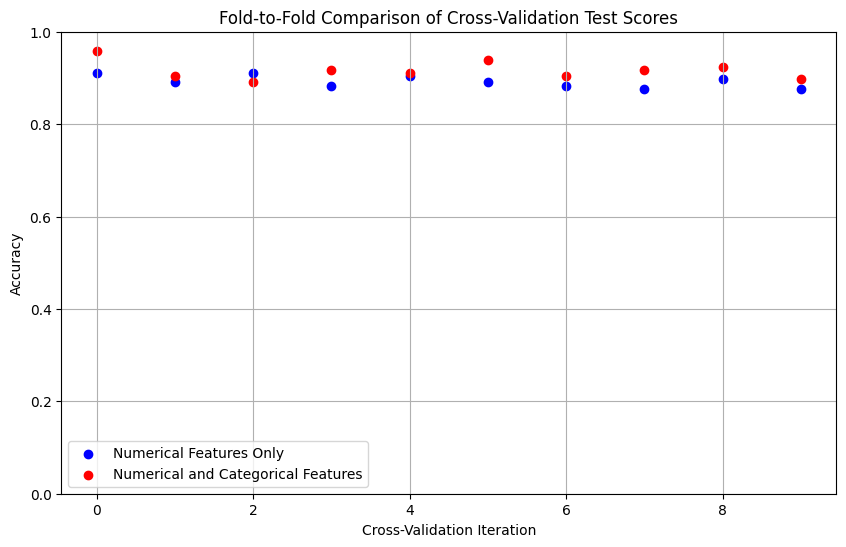

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(scores)), scores, label='Numerical Features Only', color='blue')
plt.scatter(range(len(scores2)), scores2, label='Numerical and Categorical Features', color='red')
plt.xlabel('Cross-Validation Iteration')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Fold-to-Fold Comparison of Cross-Validation Test Scores')
plt.legend()
plt.grid(True)
plt.show()


A model using all features is better than a model using only numerical features for 9 CV iterations out of 10.


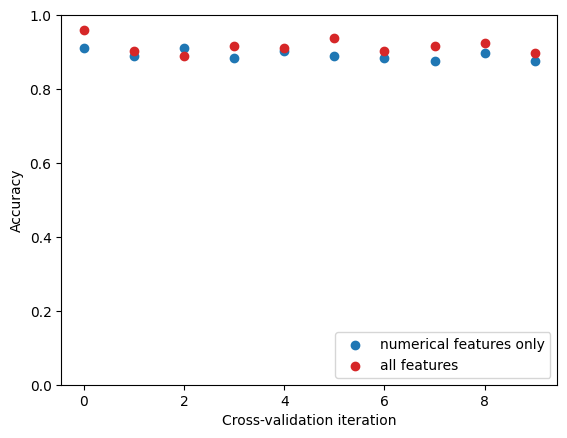

In [14]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(len(scores))
plt.scatter(
    indices, scores, color="tab:blue", label="numerical features only"
)
plt.scatter(
    indices,
    scores2,
    color="tab:red",
    label="all features",
)
plt.ylim((0, 1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("Accuracy")
_ = plt.legend(loc="lower right")

print(
    "A model using all features is better than a"
    " model using only numerical features for"
    f" {sum(scores2 > scores)} CV iterations out of 10."
)